In [1]:
# User-Agent 추가
user_agent = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

In [2]:
# 해시코드 사이트의 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려보기 
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해보자.

import requests
from bs4 import BeautifulSoup

questions = []

import time

for i in range(1,6):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), {"User-Agent": user_agent})
    soup = BeautifulSoup(res.text, "html.parser") #soup에는 요청을 보낸 것에 대한 정보가 parsing이 되어 저장되어 있음
    
    parsed_datas = soup.find_all("li", "question-list-item")
    
    for data in parsed_datas:
        questions.append(data.h4.text.strip()) 
    time.sleep(0.5)


In [3]:
questions[:10]

['css 그리드에서 겉이 아닌 속에 선을 넣고 싶습니다.',
 '간단한 자바 반복문을 배우는 중인데,  증감연산자에 대해 잘 모르겠습니다',
 'Java list를 map으로 변환 하려고 합니다',
 'Python telnet 통신 초기화 질문',
 '파이썬 크롤링 관련하여 질문드립니다.',
 '자바 list의 sublist 사용해서 배열을 거꾸로 배치하는 코딩',
 '리스트 요소로 리스트 명을 출력하고 싶다.',
 '자바 클래스에서 private 선언 질문이요',
 "파이썬 '파일 생성' 오류 발생",
 'img 태그의 id를 이용해 표나 그리드에 사진을 넣을 수 있나요?']

In [9]:
# 라이브러리 불러오기

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import Counter

#문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [10]:

words = []

hannanum = Hannanum()
for question in questions:
    nouns = hannanum.nouns(question) # 1번 반복할 때 나온 명사들
    words += nouns #누적해서 나오는 명사들
print(len(words))

1081


In [11]:
# Counter를 이용해 각 단어의 개수 세주기
counter = Counter(words)


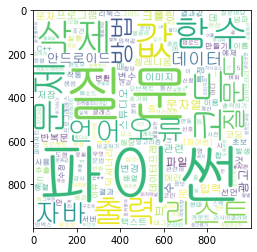

In [13]:
wordcloud = WordCloud(
    font_path="gulim",
    background_color="white",
    height=1000,
    width=1000,
)

img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)

In [ ]:
# 웹에서 정보를 얻어올 때, 웹 브라우저 뿐만이 아니라 파이썬을 활용해서도 진행될 수 있다.